# Wrangle and Analyze Twitter Data

The dataset we'll explore contains tweet data as of August 1, 2017 for Twitter user @dog_rates (WeRateDogs).

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Gathering the Data

#### 1. Enhanced Twitter archive

Basic tweet data and additional information (i.e. rating, dog name, dog stage) extracted from each tweet's text

In [2]:
# Read csv file into dataframe
tweets = pd.read_csv('twitter-archive-enhanced.csv')

#### 2. Image predictions

Top three dog breed predictions for each tweet

In [3]:
import requests
import os

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)

# Make directory if it doesn't already exist
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
# Download tsv file from Udacity's server    
with open(os.path.join(folder_name, url.split('/')[-1]),mode='wb') as file:
    file.write(r.content)

In [4]:
# Check tsv file in the directory
os.listdir(folder_name)

['image-predictions.tsv']

In [5]:
# Read tsv file into dataframe
predictions = pd.read_csv('image_predictions/image-predictions.tsv', '\t')

#### 3. Additional data (tweet counts) via Twitter API

Retweet count and favorite count extracted using Twitter API

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = tweets.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()

In [6]:
# Read JSON file into dataframe
import json 

df_list = []
for line in open('tweet-json.txt', 'r'):
    data = json.loads(line)
    tweet_id = data['id']
    retweet_count = data['retweet_count']
    favorite_count = data['favorite_count']
    
    # Append to list of dictionaries
    df_list.append({'tweet_id': tweet_id,
                    'retweet_count': retweet_count,
                    'favorite_count': favorite_count})

In [7]:
# Convert list into dataframe
counts = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

## Assessing the Data

### Visual Assessment

In [8]:
# Display maximum column width
pd.set_option('display.max_colwidth', -1)

In [9]:
tweets

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [10]:
predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [11]:
counts

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


### Programmatic Assessment

Inspect data types and missing values

In [12]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


Display descriptive statistics

In [15]:
tweets.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [16]:
predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [17]:
counts.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


Check for duplicates

In [18]:
tweets.duplicated().sum()

0

In [19]:
predictions.duplicated().sum()

0

In [20]:
counts.duplicated().sum()

0

In [21]:
tweets.expanded_urls.duplicated().sum()

137

In [22]:
predictions.jpg_url.duplicated().sum()

66

### Quality

#### `tweets` table
- Contains retweets
- Missing records in expanded_urls column
- Missing records in in_reply_to_status_id and in_reply_to_user_id columns
- Erroneous data type (timestamp, in_reply_to_status_id, in_reply_to_user_id)
- Incorrect names (a, an, the, such, the, quite)
- Some tweets have rating denominator less than 10
- Missing dog stages
- Duplicate values in expanded_urls column

#### `predictions` table
- Inconsistent letter case of dog breeds (p1, p2, p3 columns)
- Duplicate values in jpg_url column

### Tidiness

#### `tweets` table
- Dog stage columns (doggo, floofer, pupper, puppo) are not merged into one column

#### `predictions` table
- Prediction columns are not merged (p1, p2, p3, ...)

#### `counts` table
- Should be combined with `tweets` table

## Cleaning the Data

In [23]:
# Copy original dataframes
tweets_clean = tweets.copy()
predictions_clean = predictions.copy()
counts_clean = counts.copy()

### Quality

#### 1. `tweets`: Missing records in expanded_urls column

##### Define 

Drop rows with null expanded_urls as they don't have image predictions.

##### Code

In [24]:
# Check if rows with null expanded_urls have image predictions
sum(tweets_clean[tweets_clean.expanded_urls.isnull()]['tweet_id'].isin(predictions_clean.tweet_id))

0

In [25]:
# Drop the rows
tweets_clean.dropna(subset=['expanded_urls'], axis=0, inplace=True)

##### Test

In [26]:
sum(tweets_clean.expanded_urls.isnull())

0

#### 2. `tweets`: Missing records in in_reply_to_status_id and in_reply_to_user_id columns 

##### Define

Drop in_reply_to_status_id and in_reply_to_user_id columns

##### Code

In [27]:
# Check tweets related to the missing records
tweets_clean[tweets_clean.in_reply_to_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Ladies and gentlemen... I found Pipsy. He may have changed his name to Pablo, but he never changed his love for the sea. Pupgraded to 14/10 https://t.co/lVU5GyNFen",NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547188785154/photo/1,14,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY HI AFTER ALL. PUPGRADED TO A 14/10. WOULD BE AN HONOR TO FLY WITH https://t.co/p1hBHCmWnA",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610513747968/photo/1,14,10,None,None,None,None,None
251,844979544864018432,7.590995e+17,4.196984e+09,2017-03-23 18:29:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","PUPDATE: I'm proud to announce that Toby is 236 days sober. Pupgraded to a 13/10. We're all very proud of you, Toby https://t.co/a5OaJeRl9B",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/844979544864018432/photo/1,https://twitter.com/dog_rates/status/844979544864018432/photo/1,https://twitter.com/dog_rates/status/844979544864018432/photo/1",13,10,None,None,None,None,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048156610565/photo/1,11,10,None,doggo,None,pupper,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459439529985/photo/1,0,10,None,None,None,None,None
1018,746818907684614144,6.914169e+17,4.196984e+09,2016-06-25 21:34:37 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Guys... Dog Jesus 2.0\n13/10 buoyant af https://t.co/CuNA7OwfKQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746818907684614144/photo/1,13,10,None,None,None,None,None
1127,729838605770891264,7.291135e+17,4.196984e+09,2016-05-10 01:00:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""Challenge completed"" \n(pupgraded to 12/10) https://t.co/85dTK7XCXB",NaN,NaN,NaN,https://twitter.com/dog_rates/status/729838605770891264/video/1,12,10,None,None,None,None,None
1330,705786532653883392,7.032559e+17,4.196984e+09,2016-03-04 16:06:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Seriously, add us 🐶 11/10 for sad wet pupper https://t.co/xwPE9faVZR",NaN,NaN,NaN,https://twitter.com/dog_rates/status/705786532653883392/photo/1,11,10,None,None,None,pupper,None
1339,704871453724954624,6.671522e+17,4.196984e+09,2016-03-02 03:30:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I found a forest Pipsy. 12/10 https://t.co/mIQ1KoVsmU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704871453724954624/photo/1,12,10,None,None,None,None,None
1356,703425003149250560,7.030419e+17,4.196984e+09,2016-02-27 03:42:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Really guys? Again? I know this is a rare Albanian Bingo Seal, but we only rate dogs. Only send in dogs... 9/10 https://t.co/

These are all responses to WeRateDogs' own tweets. It is difficult to link them back to the original tweets from the data we have, so I decided to  drop the columns.

In [28]:
# Drop the columns
tweets_clean.drop(columns=['in_reply_to_status_id','in_reply_to_user_id'], inplace=True)

##### Test

In [29]:
tweets_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

#### 3. `tweets`: Contains retweets

##### Define

Remove retweets and drop related columns

##### Code

In [30]:
# Remove retweets
tweets_clean = tweets_clean[tweets_clean.retweeted_status_id.isnull()]

In [31]:
# Drop columns
tweets_clean.drop(columns=['retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True)

##### Test

In [32]:
list(tweets_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

#### 4. `tweets`: Erroneous data type (timestamp, in_reply_to_status_id, in_reply_to_user_id)

##### Define

Change timestamp data type. No further action required on in_reply_to_status_id, in_reply_to_user_id columns.

##### Code

In [33]:
tweets_clean['timestamp'] = pd.to_datetime(tweets_clean['timestamp'])

##### Test

In [34]:
tweets_clean.dtypes

tweet_id              int64         
timestamp             datetime64[ns]
source                object        
text                  object        
expanded_urls         object        
rating_numerator      int64         
rating_denominator    int64         
name                  object        
doggo                 object        
floofer               object        
pupper                object        
puppo                 object        
dtype: object

#### 5. `tweets`: Incorrect names (a, an, the, such, the, quite)

##### Define

Extract correct names from each tweet. If no name found, replace value with 'None'.

##### Code

In [35]:
# Extract names and store in a dataframe
names = tweets_clean.text.str.extract('(This is |Meet |Say hello to |named |name is )([A-Z][a-z]+)( and [A-Z][a-z]+)?')
names = (names[1] + names[2].fillna('')).to_frame()

# Concatenate new name column into tweets df
tweets_clean = pd.concat([tweets_clean, names], axis=1)
tweets_clean.drop(columns=['name'],inplace=True)
tweets_clean.rename(columns={0: "name"},inplace=True)

# Replace null values with 'None'
tweets_clean.name.replace(np.nan,'None',inplace=True)

##### Test

In [36]:
# Check if incorrect names still exist
sum(tweets_clean.name.isin(['a','an','the','such','quite']))

0

#### 6. `tweets`: Some tweets have rating denominator less than 10

##### Define

Extract correct ratings for tweets with rating denominator less than 10

##### Code

In [37]:
tweets_clean[tweets_clean.rating_denominator<10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,name
516,810984652412424192,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,None,None,None,None,Sam
2335,666287406224695296,2015-11-16 16:11:11,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,https://twitter.com/dog_rates/status/666287406224695296/photo/1,1,2,None,None,None,None,None


In [38]:
# Remove tweet 810984652412424192 since it doesn't contain a rating
tweets_clean = tweets_clean[tweets_clean.tweet_id != 810984652412424192]

In [39]:
# Change tweet 666287406224695296 manually
tweets_clean.at[2335,'rating_numerator'] = 9
tweets_clean.at[2335,'rating_denominator'] = 10

##### Test

In [40]:
tweets_clean[tweets_clean.tweet_id==666287406224695296]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,name
2335,666287406224695296,2015-11-16 16:11:11,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,https://twitter.com/dog_rates/status/666287406224695296/photo/1,9,10,None,None,None,None,None


In [41]:
sum(tweets_clean.rating_denominator<10)

0

#### 7. `tweets`: Missing dog stages

##### Define

Extract correct dog stages from each tweet

##### Code

In [42]:
# Extract dog stages into a new df
dog_stages = tweets_clean.text.str.extract('(doggo|pupper|puppo|floofe?r?)')

# Concatenate dog_stages into tweets_clean and rename the column 
tweets_clean = pd.concat([tweets_clean, dog_stages], axis=1)
tweets_clean.rename(columns={0: 'dog_stage'},inplace=True)

# Replace floof with floofer and null with None
tweets_clean.dog_stage.replace('floof','floofer',inplace=True)
tweets_clean.dog_stage.replace(np.nan,'None',inplace=True)

In [43]:
# Drop old dog stages columns
tweets_clean.drop(columns=['doggo','floofer', 'pupper', 'puppo'], inplace=True)

In [44]:
# Convert new column into a category
tweets_clean['dog_stage'] = tweets_clean.dog_stage.astype('category')

##### Check

In [45]:
tweets_clean.dog_stage.value_counts()

None       1741
pupper     242 
doggo      81  
puppo      29  
floofer    23  
Name: dog_stage, dtype: int64

In [46]:
tweets_clean.dtypes

tweet_id              int64         
timestamp             datetime64[ns]
source                object        
text                  object        
expanded_urls         object        
rating_numerator      int64         
rating_denominator    int64         
name                  object        
dog_stage             category      
dtype: object

#### 8. `tweets`: Duplicate values in expanded_urls column

##### Define

Remove rows with duplicate values in expanded_urls

##### Code

In [47]:
# Inspect duplicated values
tweets_clean[tweets_clean.expanded_urls.duplicated()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
2212,668587383441514497,2015-11-23 00:30:28,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",Never forget this vine. You will not stop watching for at least 15 minutes. This is the second coveted.. 13/10 https://t.co/roqIxCvEB3,https://vine.co/v/ea0OwvPTx9l,13,10,None,None


In [48]:
tweets_clean[tweets_clean.expanded_urls=='https://vine.co/v/ea0OwvPTx9l']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
657,791774931465953280,2016-10-27 22:53:48,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",Vine will be deeply missed. This was by far my favorite one. 14/10 https://t.co/roqIxCvEB3,https://vine.co/v/ea0OwvPTx9l,14,10,None,None
2212,668587383441514497,2015-11-23 00:30:28,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",Never forget this vine. You will not stop watching for at least 15 minutes. This is the second coveted.. 13/10 https://t.co/roqIxCvEB3,https://vine.co/v/ea0OwvPTx9l,13,10,None,None


In [49]:
# Drop the original tweet
tweets_clean = tweets_clean[tweets_clean.tweet_id != 668587383441514497]

##### Test

In [50]:
sum(tweets_clean.expanded_urls.duplicated())

0

#### 9. `predictions`: Inconsistent letter case of dog breeds (p1, p2, p3 columns)

##### Define

Change dog breed text into lower case

##### Code

In [51]:
predictions_clean['p1'] = predictions_clean.p1.str.lower()
predictions_clean['p2'] = predictions_clean.p2.str.lower()
predictions_clean['p3'] = predictions_clean.p3.str.lower()

##### Test

In [52]:
predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


#### 10. `predictions`: Duplicate values in jpg_url column

##### Define

Remove rows with duplicate values in jpg_url

##### Code

In [53]:
predictions_clean.drop_duplicates(subset=['jpg_url'], inplace=True)

##### Test

In [54]:
predictions_clean.jpg_url.duplicated().sum()

0

### Tidiness

#### 1. `tweets`: Dog stage columns (doggo, floofer, pupper, puppo) are not merged into one column

Already cleaned as part of item #7 above.

In [55]:
tweets_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

#### 2. `counts`: Should be merged with `tweets` table

##### Define

Merge `counts` table with `tweets` table

##### Code

In [56]:
tweets_clean = tweets_clean.merge(counts_clean, on=["tweet_id"])

##### Test

In [57]:
tweets_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,8853,39467
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,6514,33819
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,4328,25461
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,8964,42908
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,9774,41048


#### 3. `predictions`: Prediction columns are not merged (p1, p2, p3, ...)

##### Define

Unpivot prediction columns (p1, p1_conf, p1_dog, etc.) using `melt` function

##### Code

In [58]:
# Remove rows in predictions table that are not in tweets table
predictions_clean = predictions_clean[predictions_clean.tweet_id.isin(tweets_clean.tweet_id)]

# Unpivot the columns 
df1 = pd.melt(predictions_clean, id_vars=['tweet_id','jpg_url','img_num'], value_vars=['p1','p2','p3'], var_name='pred_num', value_name='prediction')
df2 = pd.melt(predictions_clean, id_vars=['tweet_id'], value_vars=['p1_conf','p2_conf','p3_conf'], var_name='pred_num', value_name='conf')
df3 = pd.melt(predictions_clean, id_vars=['tweet_id'], value_vars=['p1_dog','p2_dog','p3_dog'], var_name='pred_num', value_name='is_dog')

# Replace values for simplicity
df1.replace({'p1':'1', 'p2':'2', 'p3':'3'}, inplace=True)
df2.replace({'p1_conf':'1', 'p2_conf':'2', 'p3_conf':'3'}, inplace=True)
df3.replace({'p1_dog':'1', 'p2_dog':'2', 'p3_dog':'3'}, inplace=True)

# Merge new columns into the original df
predictions_clean = df1.merge(df2,on=['tweet_id','pred_num']).merge(df3,on=['tweet_id','pred_num'])

# Change pred_num data type to int
predictions_clean['pred_num'] = predictions_clean['pred_num'].astype(int)

##### Test

In [59]:
predictions_clean.head()

,tweet_id,jpg_url,img_num,pred_num,prediction,conf,is_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,welsh_springer_spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,1,german_shepherd,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,1,rhodesian_ridgeback,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,1,miniature_pinscher,0.560311,True


In [60]:
predictions_clean.dtypes

tweet_id      int64  
jpg_url       object 
img_num       int64  
pred_num      int64  
prediction    object 
conf          float64
is_dog        bool   
dtype: object

### Store cleaned dataframes

In [98]:
# Main df that contains tweet information
tweets_clean.to_csv('twitter_archive_master.csv', index=False)
# Df that contains image predictions
predictions_clean.to_csv('image_predictions_master.csv', index=False)

## Analysis and Visualization

After assessing and cleaning the data, we're left with two dataframes: `tweets_clean` and `predictions_clean`.

#### What is the most popular dog name?

In [96]:
tweets_clean.name.value_counts()

None                  701
Charlie               11 
Cooper                10 
Oliver                10 
Lucy                  10 
Tucker                9  
Penny                 9  
Lola                  8  
Winston               8  
Daisy                 7  
Toby                  7  
Sadie                 7  
Bailey                6  
Jax                   6  
Bella                 6  
Stanley               6  
Koda                  6  
Bo                    5  
Rusty                 5  
Scout                 5  
Louis                 5  
Oscar                 5  
Chester               5  
Leo                   5  
Buddy                 5  
Zoey                  5  
Chip                  4  
Sophie                4  
Phil                  4  
Reggie                4  
                     ..  
Halo                  1  
Kulet                 1  
Fabio                 1  
Mac                   1  
Jo                    1  
Monster               1  
Beckham               1  
Mason       

Not all dog names were provided. However, Charlie seems to be a popular dog name, closely followed by Cooper, Oliver, and Lucy.

#### Which dog stage was most frequently tweeted?

In [87]:
tweets_clean.dog_stage.value_counts()

None       1740
pupper     242 
doggo      81  
puppo      29  
floofer    23  
Name: dog_stage, dtype: int64

The dog stage is not specified in majority of the tweets, however, pupper seems to be tweeted quite frequently.

#### Which dog breed has the highest rating, retweet count, and favorite count?

Three predictions were provided for each tweet, so we'll pick the one with highest confidence.

In [67]:
predictions_clean[predictions_clean.tweet_id==tweets_clean[tweets_clean.retweet_count==max(tweets_clean.retweet_count)]['tweet_id'].iloc[0]]

,tweet_id,jpg_url,img_num,pred_num,prediction,conf,is_dog
1218,744234799360020481,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,1,1,labrador_retriever,0.825333,True
3211,744234799360020481,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,1,2,ice_bear,0.044681,False
5204,744234799360020481,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,1,3,whippet,0.018442,True


In [68]:
predictions_clean[predictions_clean.tweet_id==tweets_clean[tweets_clean.favorite_count==max(tweets_clean.favorite_count)]['tweet_id'].iloc[0]]

,tweet_id,jpg_url,img_num,pred_num,prediction,conf,is_dog
1683,822872901745569793,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,1,lakeland_terrier,0.196015,True
3676,822872901745569793,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,2,labrador_retriever,0.160329,True
5669,822872901745569793,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,3,irish_terrier,0.069126,True


In [69]:
predictions_clean[predictions_clean.tweet_id==tweets_clean[tweets_clean.rating_numerator==max(tweets_clean.rating_numerator)]['tweet_id'].iloc[0]]

,tweet_id,jpg_url,img_num,pred_num,prediction,conf,is_dog
1267,749981277374128128,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1,1,bow_tie,0.533941,False
3260,749981277374128128,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1,2,sunglasses,0.080822,False
5253,749981277374128128,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1,3,sunglass,0.050776,False


The results suggest that the Labrador retriever received the highest retweets while the Lakeland terrier received the highest favorites. Unfortunately, the neural network was not able to detect the correct dog breed in the highest rated tweet.

#### Which dog breed has the highest number of tweets?

In [79]:
predictions_clean[predictions_clean.pred_num==1]['prediction'].value_counts()

golden_retriever             138
labrador_retriever           95 
pembroke                     88 
chihuahua                    79 
pug                          54 
chow                         41 
samoyed                      40 
toy_poodle                   38 
pomeranian                   38 
malamute                     29 
cocker_spaniel               27 
french_bulldog               26 
chesapeake_bay_retriever     23 
miniature_pinscher           22 
seat_belt                    21 
german_shepherd              20 
siberian_husky               20 
staffordshire_bullterrier    19 
maltese_dog                  18 
teddy                        18 
eskimo_dog                   18 
shetland_sheepdog            18 
shih-tzu                     17 
beagle                       17 
rottweiler                   17 
cardigan                     17 
lakeland_terrier             16 
italian_greyhound            16 
kuvasz                       16 
web_site                     15 
          

The Golden retriever has the highest number of tweets, most likely because it is one of the most popular dog breed.

#### What is the rate of dog breed prediction?

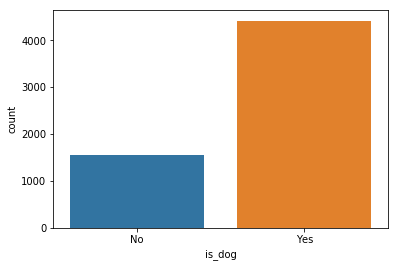

In [80]:
ax = sns.countplot(x='is_dog', data=predictions_clean);
ax.set_xticklabels(['No','Yes']);

In [81]:
# proportion of correct dog prediction
predictions_clean.is_dog.mean()

0.73841779561799636

Around 73.84% of predictions are dog breeds.

## Conclusion

The analysis performed here are only descriptive and obviously aren't in-depth enough to draw conclusions. In addition, some data are incomplete and thus could still be enhanced.  An interesting topic for future analysis would be to explore which factors affect the dog ratings.